In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')
df.dropna(inplace=True)


In [3]:
df.head()

,aphp,nhph,tertiary_hp,secondary_hp,age,gender,height,weight,bmi,marital_status,...,nephrolithiasis,bone_specific_alp,corrected_calcium_by_albumin,serum_calcium_phosphorus_ratio,pf_index,alp_combined_with_cl_po4,third_surgery_pathology_report,fourth_surgery_pathology_report,triglycerides,hdl_cholesterol
0,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0,0,0,0,60,1,0,0,0.0,1,...,0,0.0,11.2,2.8,147.0,0.0,0,0,0,0
2,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,1,0,0,0,55,1,170,73,0.0,1,...,0,0.0,12.1,4.4,413.0,0.0,0,0,0,0


In [4]:
y = df.iloc[:, :2].values
X = df.iloc[:, 2:].values

## Splitting & Using GB


In [5]:
from sklearn.model_selection import train_test_split
def create_multiclass_target(y):
    return np.where((y[:, 0] == 0) & (y[:, 1] == 0), 0,
                    np.where((y[:, 0] == 1) & (y[:, 1] == 1), 1,
                             np.where((y[:, 0] == 0) & (y[:, 1] == 1), 2, 3)))

y_multiclass = create_multiclass_target(y)
 
X_train, X_test, y_train, y_test = train_test_split(X, y_multiclass, test_size=0.2, random_state=42)


In [6]:

lgb_classifier = lgb.LGBMClassifier()

lgb_classifier.fit(X_train, y_train)
y_pred = lgb_classifier.predict(X_test)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1747
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 59
[LightGBM] [Info] Start training from score -1.139434
[LightGBM] [Info] Start training from score -1.003302
[LightGBM] [Info] Start training from score -2.066196
[LightGBM] [Info] Start training from score -1.678431
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## Using Evaluation Metrics

Accuracy =  90.0 %
Precision =  0.8843482006314394
Recall =  0.8958333333333333
F1-score =  0.8877113430175325


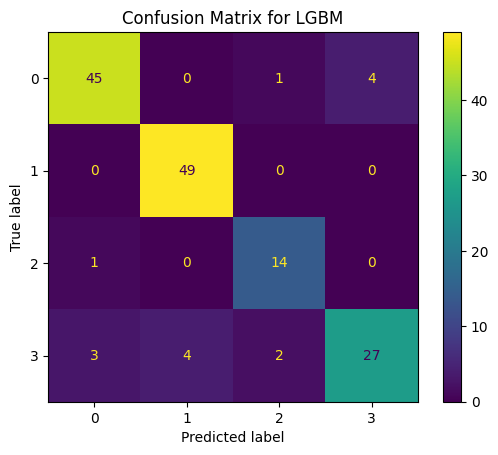

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        50
           1       0.92      1.00      0.96        49
           2       0.82      0.93      0.87        15
           3       0.87      0.75      0.81        36

    accuracy                           0.90       150
   macro avg       0.88      0.90      0.89       150
weighted avg       0.90      0.90      0.90       150



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average macro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=np.unique(y_train))
disp.plot()
plt.title('Confusion Matrix for LGBM')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 48, number of used features: 22
[LightGBM] [Info] Start training from score -1.673976
[LightGBM] [Info] Start training from score -1.163151
[LightGBM] [Info] Start training from score -2.261763
[LightGBM] [Info] Start training from score -0.926762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

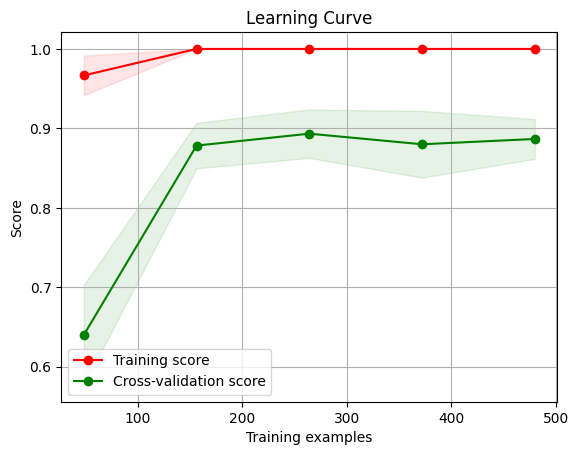

In [8]:
clf = lgb.LGBMClassifier()
def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X_train, X_test, y_train, y_test = train_test_split(X, y_multiclass, test_size=0.2, random_state=42)
plot_learning_curve(clf, X_train, y_train)
plt.show()